# SECTION 1: Feature Engineering & Model Tuning

# Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#  Load and Inspect Dataset

In [9]:
df = pd.read_csv("fraud_detection.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())


   Transaction ID   Amount    Type  Is Fraud
0               1  1873.33  credit         0
1               2  4753.62   debit         0
2               3  3660.24   debit         0
3               4  2993.69   debit         0
4               5   780.94   debit         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  1000 non-null   int64  
 1   Amount          1000 non-null   float64
 2   Type            1000 non-null   object 
 3   Is Fraud        1000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
Transaction ID    0
Amount            0
Type              0
Is Fraud          0
dtype: int64


# Preprocess Data

In [11]:
# Encode 'Type' column
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

# Drop Transaction ID if it's not useful
df = df.drop(['Transaction ID'], axis=1)


#  SECTION 2: Feature Engineering

# Create New Features

In [13]:
df['HighAmount'] = (df['Amount'] > 2000).astype(int)
df['Amount_log'] = np.log1p(df['Amount'])


# Split Dataset

In [15]:
X = df.drop('Is Fraud', axis=1)
y = df['Is Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# SECTION 3: Train Decision Tree Model

# Train Initial Model

In [17]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate Initial Model

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[169  19]
 [ 12   0]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       188
           1       0.00      0.00      0.00        12

    accuracy                           0.84       200
   macro avg       0.47      0.45      0.46       200
weighted avg       0.88      0.84      0.86       200



# SECTION 4: Hyperparameter Tuning

#  Use GridSearchCV

In [21]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           scoring='f1',
                           cv=5,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Evaluate Tuned Model

In [43]:
y_pred_best = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


[[169  19]
 [ 12   0]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       188
           1       0.00      0.00      0.00        12

    accuracy                           0.84       200
   macro avg       0.47      0.45      0.46       200
weighted avg       0.88      0.84      0.86       200



# Recommendations & Deliverables

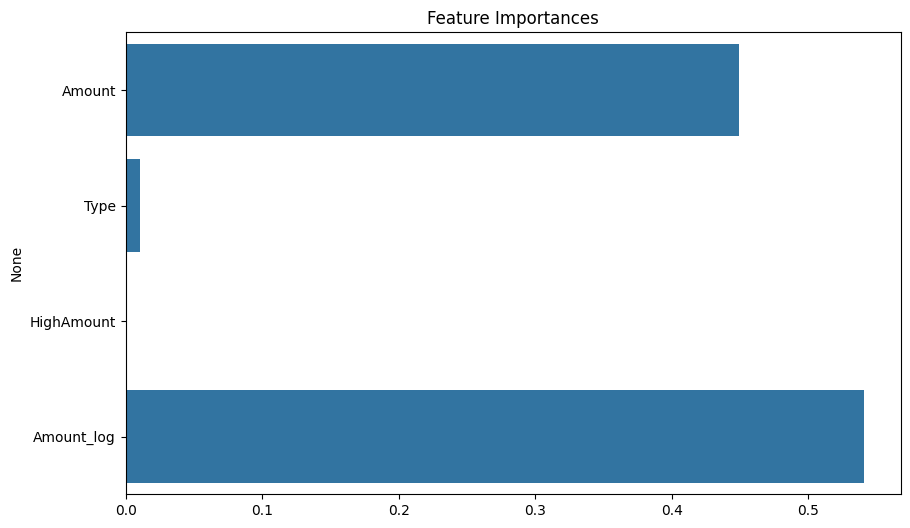

In [25]:
# Plot feature importance
importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()
